# Visualization

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
births = pd.read_csv("../lec/lec07/baby.csv")
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


## Kernel Density Estimation

Kernel Density Estimation（KDE）是一种非参数的方法，用于估计随机变量的概率密度函数。它是一种平滑的方式来展示数据的分布情况，不依赖于数据的具体分布假设。

### 核心概念

1. **非参数方法**：
   KDE 不需要对数据分布做出假设（如正态分布、指数分布等），而是基于样本数据直接估计密度函数。这与参数统计方法（如正态分布假设下的高斯密度估计）不同。

2. **核函数**：
   KDE 使用核函数（如高斯核）来平滑数据点。核函数是一个对称的函数，通常是单峰的。例如，高斯核函数为：
   \[
   K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}
   \]
   核函数的选择和宽度（带宽）会影响估计结果。

3. **带宽参数**：
   带宽参数（或称为平滑参数）控制核函数的宽度，影响估计的平滑程度。带宽过小会导致过度拟合（出现过多的尖峰），带宽过大会导致过度平滑（估计过于平坦）。

### KDE 的作用

1. **数据分布可视化**：
   KDE 提供了数据的平滑分布图，帮助理解数据的分布模式，而不仅仅是看到数据的离散点。它可以直观地展示数据的集中趋势、分布形状和潜在的多个峰值。

2. **密度估计**：
   KDE 估计了数据的概率密度函数，可以用来计算某个区间内数据的概率。它比直方图提供了更平滑的密度估计，不受直方图分箱宽度的影响。

3. **发现数据的特征**：
   通过 KDE，可以发现数据的潜在模式，如多峰性（数据有多个集中区域），这在进行数据分析时非常有用。


## Bar Plot

In [16]:
births["Maternal Smoker"].value_counts()

Maternal Smoker
False    715
True     459
Name: count, dtype: int64

<Axes: xlabel='Maternal Smoker'>

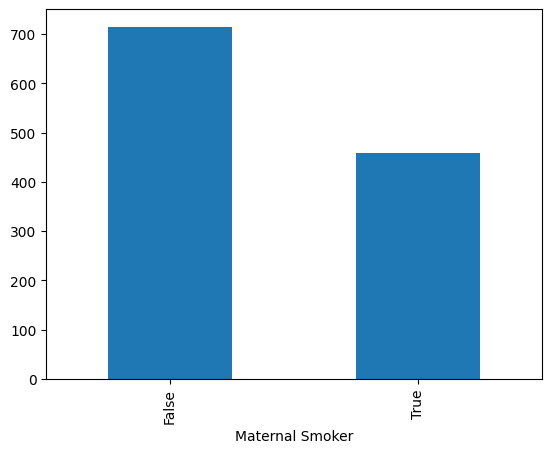

In [18]:
births["Maternal Smoker"].value_counts().plot(kind='bar')

<BarContainer object of 2 artists>

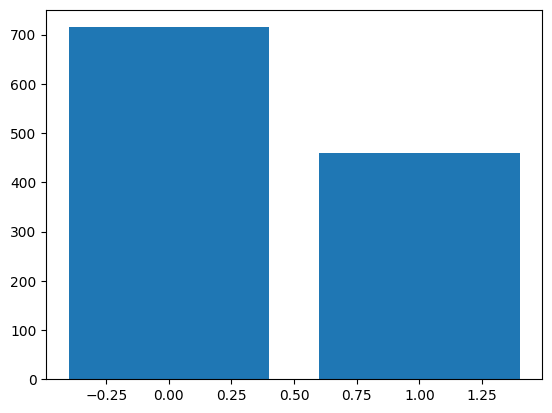

In [19]:
ms = births["Maternal Smoker"].value_counts()
plt.bar(ms.index,ms)

### use Seabork

In [28]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


### sns.count(data=df,x="xlabel")

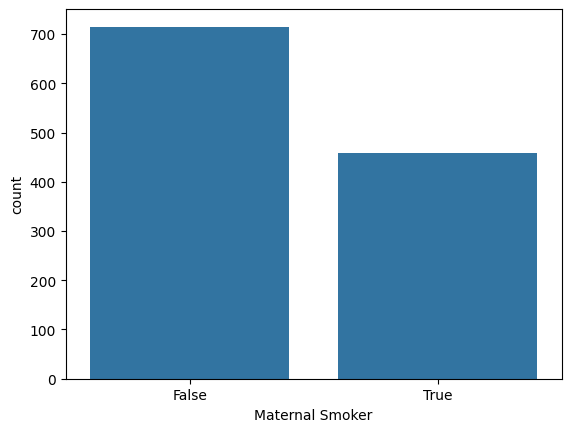

In [26]:
import seaborn as sns
sns.countplot(data = births, x = 'Maternal Smoker');

<Axes: xlabel='count', ylabel='Maternal Smoker'>

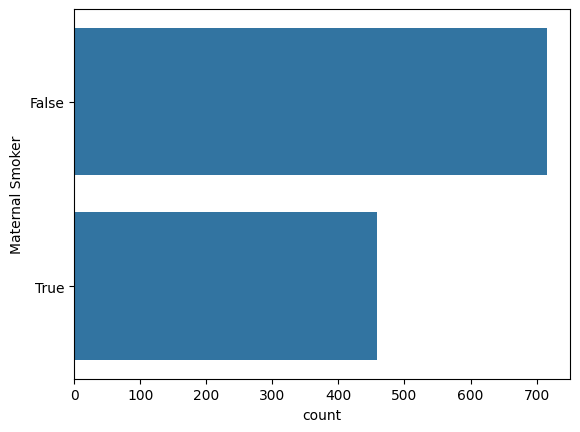

In [25]:
sns.countplot(data=births, y = 'Maternal Smoker')

### plotly (plots are interactive)

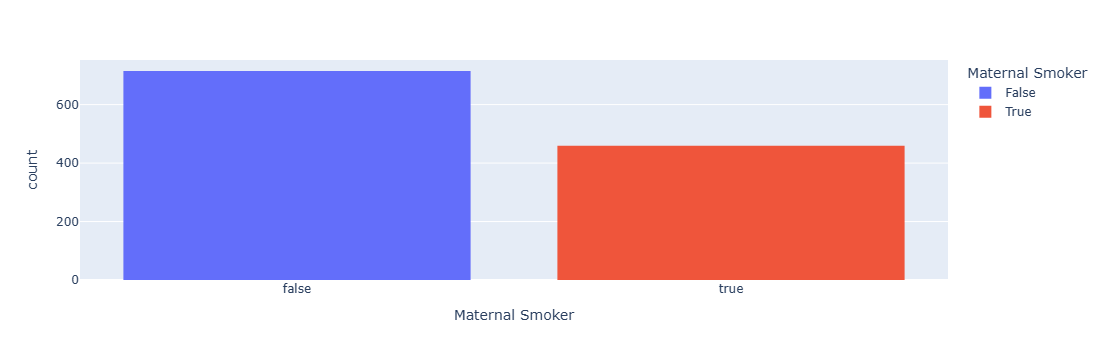

In [32]:
import plotly.express as px
px.histogram(births,x="Maternal Smoker",color = "Maternal Smoker")

### histogram
主要是sns.histplot

想用直方图统计怀孕女性的体重

- histplot: 主要用于显示数值型数据的分布情况。
- countplot: 主要用于显示分类数据中每个类别的频数。

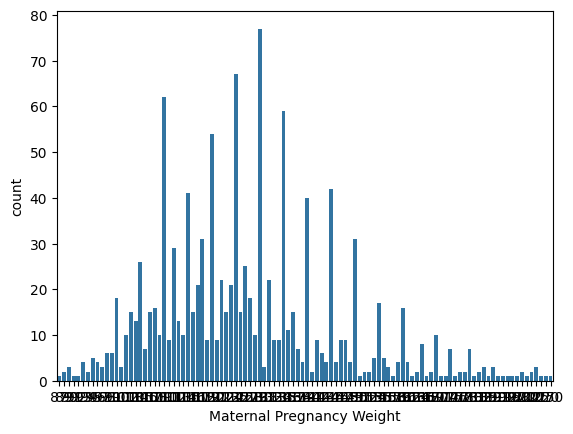

In [50]:
sns.countplot(data = births, x = 'Maternal Pregnancy Weight');

#### sns.histplot(data = df, x = "name", bins=num, kde=True)

<Axes: xlabel='Maternal Pregnancy Weight', ylabel='Count'>

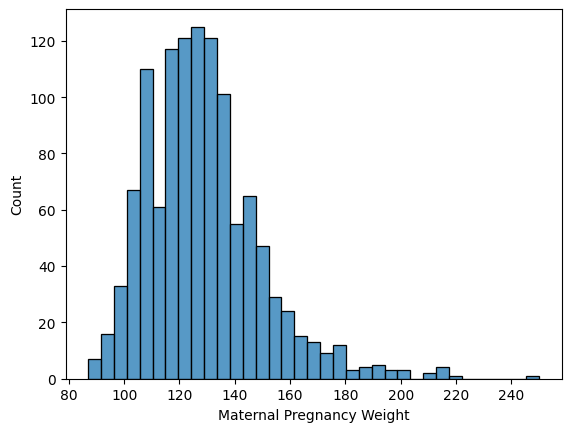

In [49]:
sns.histplot(data=births,x="Maternal Pregnancy Weight")

bins代表区间的总数目

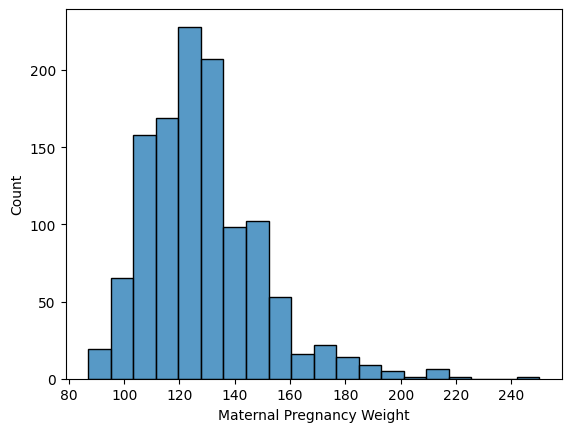

In [44]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', bins = 20);

rugplot会显示每个区间具体的数量

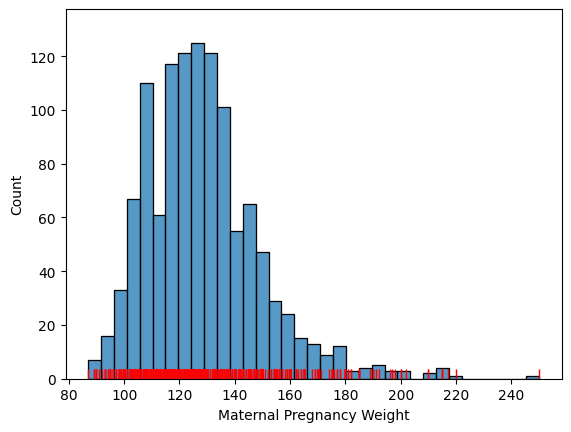

In [46]:
sns.histplot(data=births,x="Maternal Pregnancy Weight")
sns.rugplot(data = births, x = 'Maternal Pregnancy Weight', color = "red");

### 描述术语
1. **Skewness（偏度）**: 衡量数据分布的对称性。正偏度（右偏）表示数据尾部向右延伸，负偏度（左偏）表示尾部向左延伸。

2. **Tails（尾部）**: 指数据分布的两端部分，尤其是距离中心较远的部分。长尾分布表明有较多的数据点远离中心。

3. **Outliers（异常值）**: 指明显偏离其他数据点的个别数据点。它们可能极端高或极端低，可能对数据分析产生重大影响。

4. **Modes（众数）**: 数据集中出现频率最高的数值。一个数据集可以有一个（单峰）、两个（双峰）或多个（多峰）众数。


#### **Density curve（密度曲线）** 
是一个用来表示连续随机变量的概率分布的图形。它描述了数据的分布情况，曲线下方的面积等于1，代表总的概率。密度曲线的形状可以帮助我们理解数据的集中趋势和分布特征。常见的密度曲线包括正态分布曲线、均匀分布曲线等。

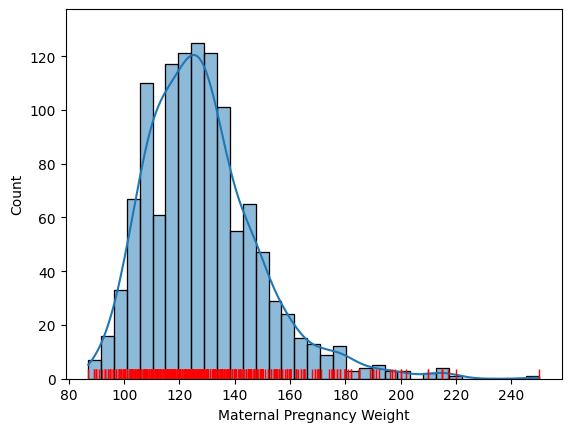

In [54]:
sns.histplot(data=births,x="Maternal Pregnancy Weight",kde = True)
sns.rugplot(data = births, x = 'Maternal Pregnancy Weight', color = "red");

画一下non-smoking mom 和 smoking mom的baby体重直方图

<Axes: xlabel='Birth Weight', ylabel='Count'>

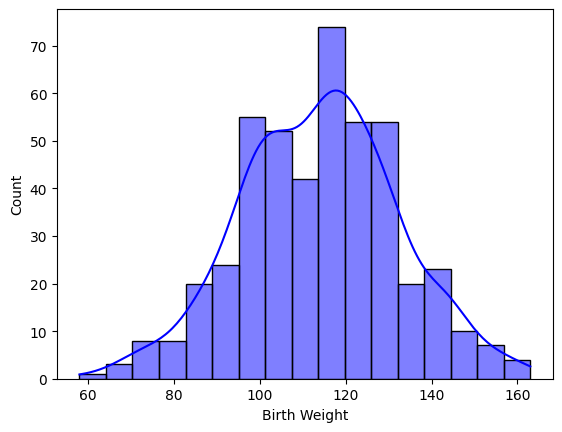

In [71]:
smoking = births[births["Maternal Smoker"] == True]
sns.histplot(data=smoking, x = "Birth Weight",kde = True,color="blue")

Bimodal

<Axes: xlabel='Birth Weight', ylabel='Count'>

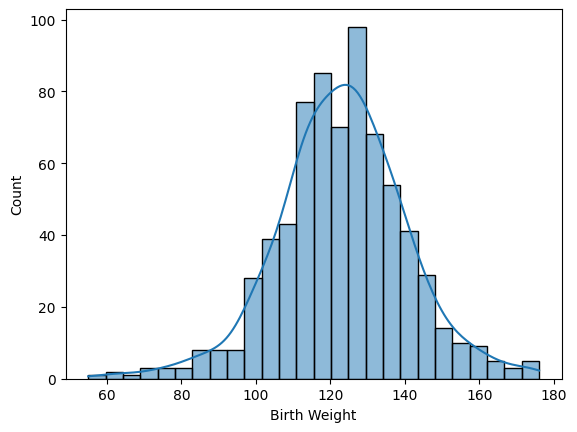

In [69]:
nonsmoking = births[births["Maternal Smoker"] == False]
sns.histplot(data=nonsmoking, x = "Birth Weight",kde = True)

unimodal

#### stat="density",数据的概率密度

<Axes: xlabel='Maternal Pregnancy Weight', ylabel='Density'>

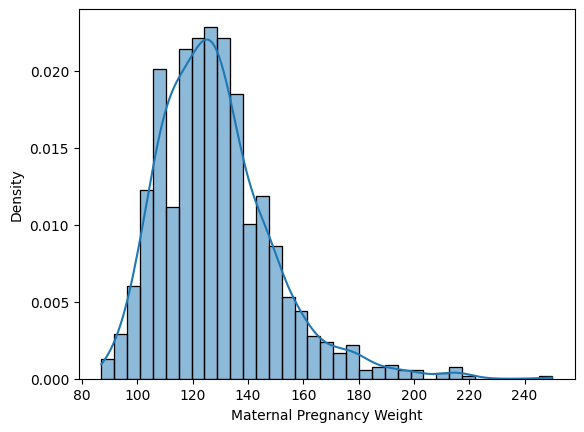

In [72]:
sns.histplot(data=births,x="Maternal Pregnancy Weight",kde=True,stat="density")

plotpy画直方图是这样的

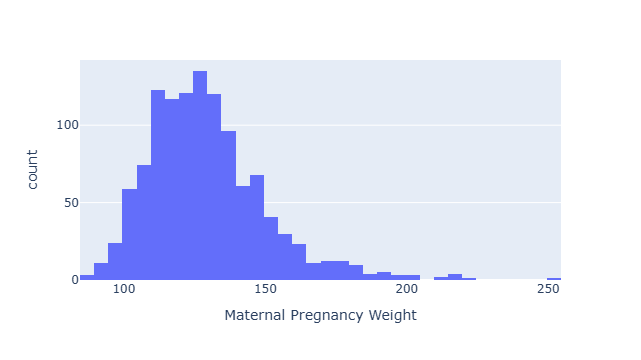

In [36]:
px.histogram(births,x="Maternal Pregnancy Weight")

## Scatter Plot

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<Axes: xlabel='x', ylabel='y'>

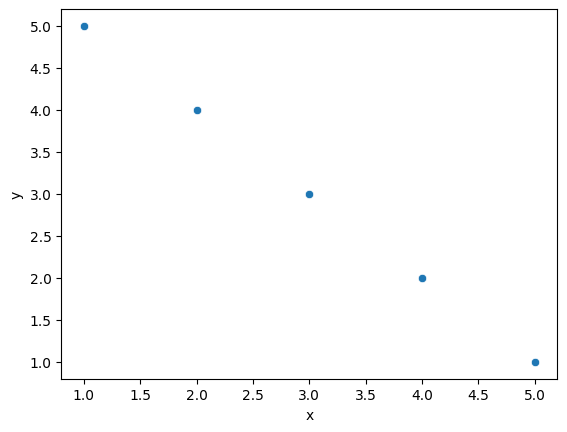

In [2]:
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [5, 4, 3, 2, 1]
})
sns.scatterplot(data=data,x="x",y="y")

## Box Plots

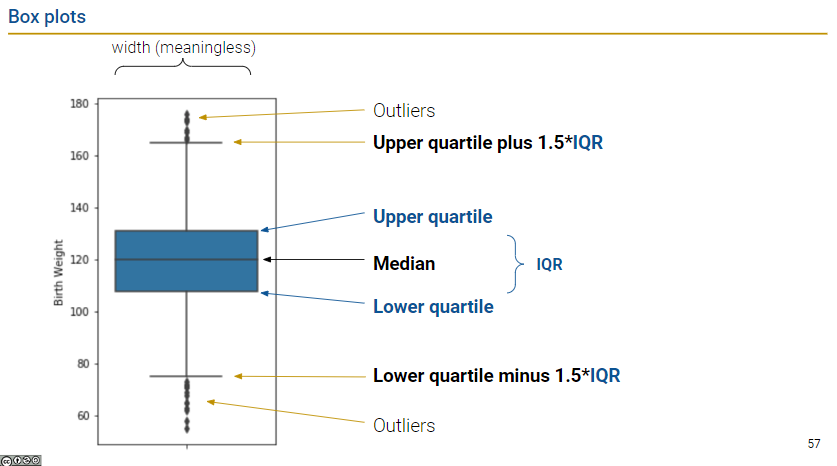

In [76]:
from IPython.display import Image
Image(filename='../img/boxplot.png')

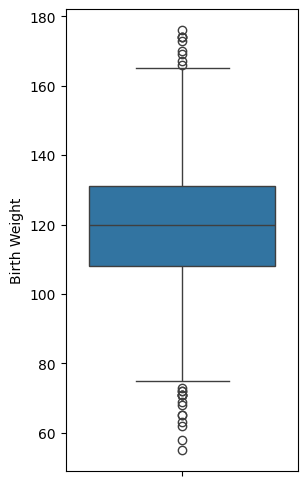

In [73]:
plt.figure(figsize = (3, 6))
sns.boxplot(y = "Birth Weight", data = births);

In [74]:
bweights = births["Birth Weight"]
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1
whisk1 = q1 - 1.5*iqr
whisk2 = q3 + 1.5*iqr

whisk1, q1, q2, q3, whisk2

(73.5, 108.0, 120.0, 131.0, 165.5)

- whisk1: 下须的起点，用于定义下界异常值。
- q1: 第一四分位数。
- q2: 中位数（第二四分位数）。
- q3: 第三四分位数。
- whisk2: 上须的终点，用于定义上界异常值。

## Violin Plots

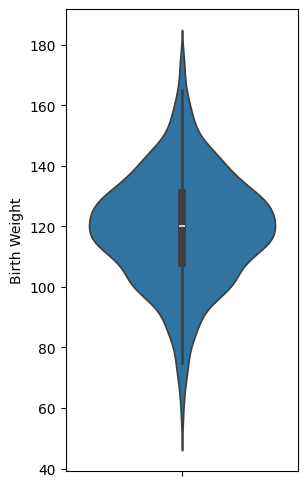

In [75]:
plt.figure(figsize = (3, 6))
sns.violinplot(y=births["Birth Weight"]);

剩下的都在lec7,对应Side by side box plots and violin plots开始